# Análisis de Discriminante Lineal
En el presente estudio, se realiza el análisis y modelado de un conjunto de datos relacionado con el uso de tarjetas de crédito. En el contexto de detección de fraudes en transacciones con tarjeta de crédito, el LDA busca encontrar una combinación lineal de características que maximice la distancia entre las medias de las clases y minimice la dispersión dentro de cada clase. Esto significa que el LDA busca un límite de decisión óptimo que permita distinguir entre transacciones legítimas y fraudulentas en función de las características observadas. Una vez entrenado, el modelo puede predecir la clase de nuevas transacciones basándose en esta combinación lineal de características.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA #Componentes principales
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

In [ ]:
# Cargamos el conjunto de datos desde un archivo CSV.
datos = pd.read_csv('/content/tarjetas.csv', header=0, delimiter=";", decimal=",")

# Eliminar filas con valores nulos
datos.dropna(inplace=True)

#Excluimos de la base las columnas de variables categoricas
datos = datos.drop("id", axis=1)

#find how many total observations are in dataset
len(datos.index)


22406

In [ ]:
datos.head(5896)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-2.606480e+16,-4.696480e+16,2.496270e+16,-8.372390e+15,1.296810e+15,7.328980e+15,5.190140e+15,-1.300060e+16,7.271590e+15,6.377350e+15,...,-1.105520e+16,2.176060e+16,-1.347940e+15,1.659590e+15,1.262800e+15,-4.348240e+16,-8.123010e+15,-1.510450e+15,179821,0
1,9.851000e+15,-3.560450e+15,5.580560e+15,-4.296540e+15,2.771400e+15,4.286050e+15,4.064660e+15,-1.331180e+16,3.474520e+15,5.298080e+15,...,-1.949360e+16,-6.057610e+15,7.946910e+15,-5.773950e+15,1.900900e+15,2.965030e+15,-2.480520e+16,-6.451190e+14,653137,0
2,-2.602720e+16,-9.493850e+15,1.728540e+16,-4.579860e+15,7.406170e+15,1.419480e+16,7.435110e+15,-9.557600e+15,-2.612970e+15,6.907080e+15,...,-5.020280e+16,7.029060e+15,9.450450e+15,-1.154670e+16,-6.055640e+15,-3.128950e+15,-3.002580e+13,-2.447180e+16,251354,0
3,-1.521520e+16,-5.089590e+14,1.746840e+15,-1.090180e+15,2.494860e+15,1.143310e+16,5.182690e+15,-6.512990e+14,-2.056980e+15,5.752310e+15,...,-1.469270e+15,-3.821250e+16,-2.140480e+16,-1.893130e+16,1.003960e+16,-5.159500e+15,-1.653160e+16,4.842360e+16,538444,0
4,-2.068200e+15,-1.652800e+16,1.527050e+16,-4.482930e+16,1.061250e+16,5.305490e+15,6.588490e+14,-2.126600e+16,1.049920e+16,9.680460e+15,...,-1.069840e+16,7.297270e+14,-1.616660e+16,3.125610e+16,-4.141160e+15,1.071130e+15,2.371160e+16,4.191170e+14,1427897,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5891,8.833660e+15,-3.255700e+16,5.414010e+15,-1.820120e+16,4.228870e+16,4.650200e+15,5.491020e+15,-1.812850e+16,9.444560e+15,4.723310e+16,...,-2.798030e+16,-1.000530e+16,4.034430e+16,-6.629040e+15,4.708880e+16,-1.957760e+16,-2.558800e+16,-6.568750e+14,1300091,0
5892,1.066770e+16,-8.536110e+15,1.774970e+16,-5.801760e+14,2.533000e+16,9.944910e+15,6.385060e+15,-1.610140e+16,8.554140e+14,3.960170e+15,...,-2.290750e+16,-5.686510e+14,-2.695390e+15,9.933280e+15,-4.992330e+15,1.716650e+15,4.677530e+15,1.593000e+16,1639641,0
5893,1.304720e+16,4.617530e+15,4.998140e+16,-1.544160e+16,3.386840e+15,-1.971930e+16,6.896800e+15,-1.507780e+16,7.538910e+15,4.308930e+16,...,-8.616360e+15,4.440260e+16,5.569970e+16,7.773910e+15,-1.127430e+15,-1.118450e+16,1.172150e+16,2.982660e+16,1613258,0
5894,-3.203020e+16,2.618690e+16,-1.311080e+16,-6.071340e+15,1.474340e+15,2.018420e+15,3.110800e+15,2.040990e+15,7.272330e+15,4.262290e+14,...,-9.092390e+15,4.371730e+15,1.016880e+16,2.083000e+16,-9.286000e+15,-1.092310e+16,-1.946960e+16,7.510010e+15,1738392,0


In [ ]:
#define predictor and response variables
X = datos[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
y = datos['Class']
target_names = (datos['Class'].unique())

#Fit the LDA model
model = LinearDiscriminantAnalysis()
model.fit(X, y)

LinearDiscriminantAnalysis()

In [ ]:
#Define method to evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))


0.9307326860351459


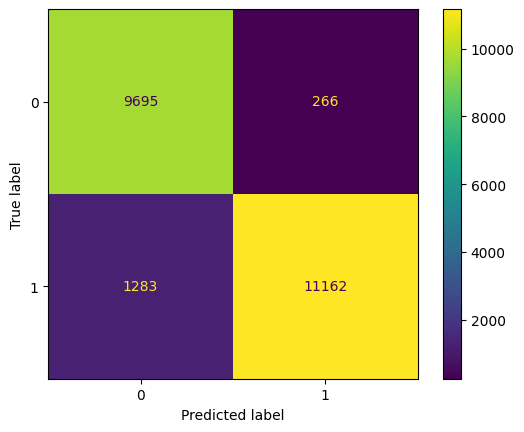

In [ ]:
y_pred = model.predict(X)

conf = confusion_matrix(y, y_pred)
# grafico matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf)
disp.plot(values_format='d')

In [ ]:
# defino variables para metricas
tn, fp, fn, tp = conf.ravel()

# Calcula el False Positive Rate (FPR) y el False Negative Rate (FNR)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

#Metricas del modelo
accuracy = accuracy_score(y, y_pred)
recall = recall_score(y, y_pred, average=None)
precision = precision_score(y, y_pred, average=None)
f1 = f1_score(y, y_pred, average=None)
#Imprimimos metricas
print(f"Exactitud : {accuracy}")
print(f"Sensibilidad : {recall}")
print(f"Precisión : {precision}")
print(f"F1 : {f1}")
print("False Positive Rate (FPR):", fpr)
print("False Negative Rate (FNR):", fnr)

Exactitud : 0.9308667321253236
Sensibilidad : [0.97329585 0.89690639]
Precisión : [0.8831299  0.97672384]
F1 : [0.92602321 0.93511498]
False Positive Rate (FPR): 0.026704146170063246
False Negative Rate (FNR): 0.10309361189232624


Resultados ligeramentes mejores

Comparativa Bayes Ingenuo:

**Exactitud** : 0.9144833742468199

**Sensibilidad** : [0.97670917 0.86467374]

**Precisión** : [0.85244896 0.97889374]

**F1** : [0.91035838 0.91824543]

**False Positive Rate (FPR)**: 0.023290834253588997

**False Negative Rate (FNR)**: 0.13532626165220185

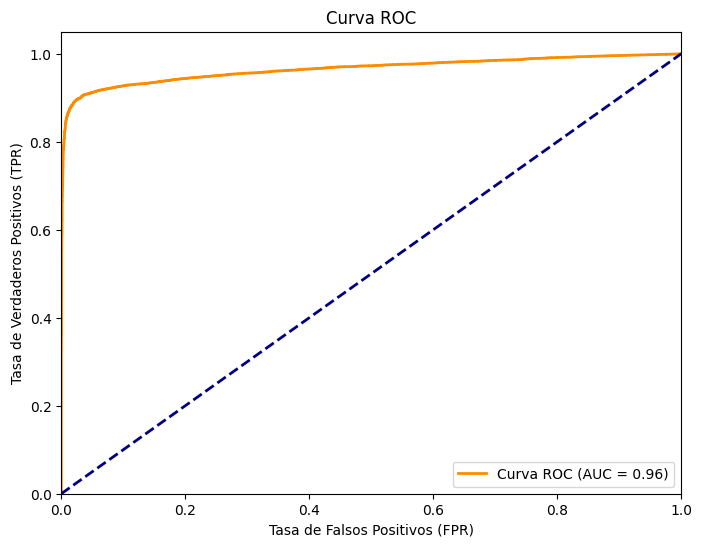

In [ ]:
y_scores = model.predict_proba(X)[:, 1]
fpr, tpr, thresholds = roc_curve(y, y_scores)
roc_auc = roc_auc_score(y, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()



Área 0.96, mejor que Bayes (0.95)

In [ ]:
# @title

labels = datos.columns[:-1]

print("Longitud de labels:", len(labels))

Longitud de labels: 29


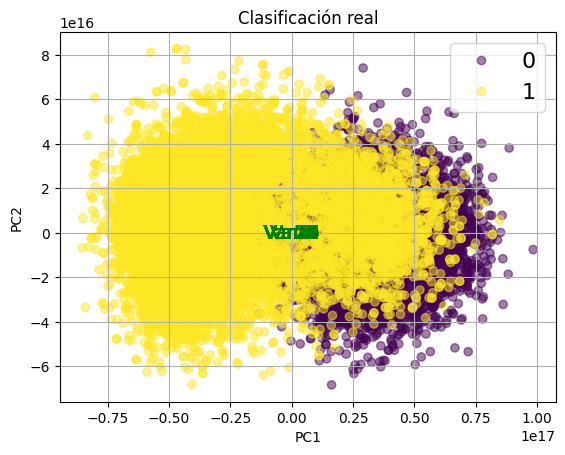

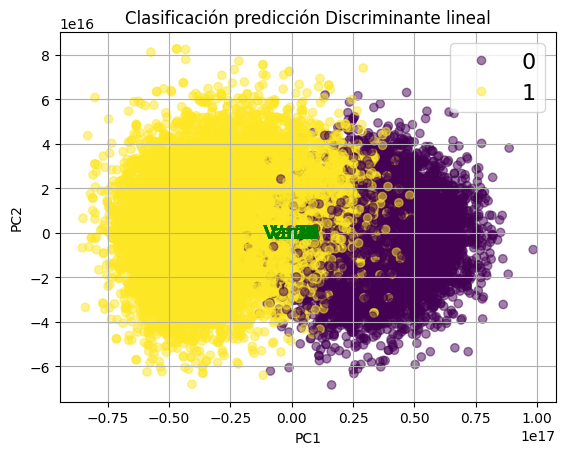

In [ ]:
# @title
pca = PCA()
pca.fit(X)
x_new = pca.transform(X)


def myplot(score,coeff,clases,labels=None):
    plt.figure()

    x1 = score[:,0]
    x2 = score[:,1]
    n = coeff.shape[0]

    scatter = plt.scatter(x1, x2, c=clases, alpha=0.5)#, cmap=colours)

    # print(scatter.legend_elements())
    # muestra etiquetas de las clases de la clasificación
    plt.legend(handles=scatter.legend_elements()[0], labels=scatter.legend_elements()[1], fontsize=16)

    # flechas de las proyecciones de las variables originales
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'r', alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center', fontsize=14)
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center', fontsize=14)



#Grafico las primeras dos componentes principales para cada clasificación

#clasificación real
myplot(x_new[:,0:2], pca.components_, y)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.title("Clasificación real")
plt.grid()
plt.show()

#clasificación bayes ingenuo
myplot(x_new[:,0:2], pca.components_, y_pred)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.title("Clasificación predicción Discriminante lineal")
plt.grid()
plt.show()


Basándonos en los resultados del Análisis de Discriminante Lineal (LDA), podemos concluir que el modelo muestra una sólida capacidad para clasificar transacciones con tarjeta de crédito. Su precisión general del 93.1% y el equilibrio entre sensibilidad y precisión sugieren que es efectivo en identificar tanto transacciones legítimas como fraudulentas. Aunque hay margen para mejorar la sensibilidad en la detección de transacciones fraudulentas, el LDA presenta un desempeño prometedor en la tarea de clasificación.

# Análsis Discriminante Cuadrático
El Análisis Discriminante Cuadrático (QDA) también se utiliza para clasificar observaciones en diferentes categorías, pero adopta un enfoque ligeramente diferente al LDA. A diferencia del LDA, que asume que las clases tienen la misma matriz de covarianza, el QDA permite que cada clase tenga su propia matriz de covarianza. En el contexto de detección de fraudes en transacciones con tarjeta de crédito, el QDA busca modelar la distribución de cada clase por separado, lo que le brinda mayor flexibilidad para capturar la complejidad de los datos. Al igual que el LDA, el QDA busca encontrar límites de decisión óptimos basados en las características observadas, pero lo hace utilizando modelos de covarianza específicos para cada clase. De esta manera, el QDA puede adaptarse mejor a las diferencias en la variabilidad de las características entre las clases, lo que podría traducirse en un mejor rendimiento en la clasificación de transacciones fraudulentas y legítimas.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
# Cargamos el conjunto de datos desde un archivo CSV.
datos = pd.read_csv('/content/tarjetas.csv', header=0, delimiter=";", decimal=",")

# Eliminar filas con valores nulos
datos.dropna(inplace=True)

#Excluimos de la base las columnas de variables categoricas
datos = datos.drop("id", axis=1)

#find how many total observations are in dataset
len(datos.index)


22406

In [ ]:
#define predictor and response variables
X = datos[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
y = datos['Class']


#Fit the LDA model
model = QuadraticDiscriminantAnalysis()
model.fit(X, y)


QuadraticDiscriminantAnalysis()

In [ ]:
#Define method to evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))

0.9265077704999894


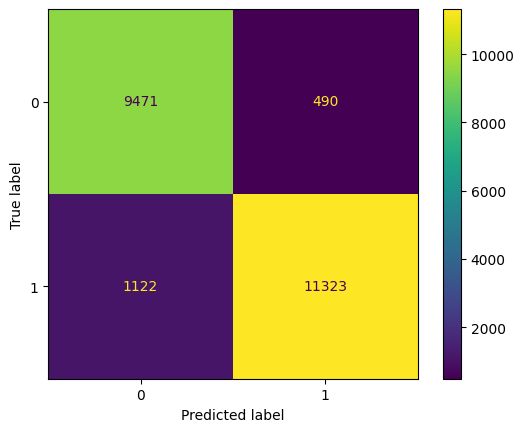

In [ ]:
y_pred = model.predict(X)

conf = confusion_matrix(y, y_pred)
# grafico matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf)
disp.plot(values_format='d')

In [ ]:
# defino variables para metricas
tn, fp, fn, tp = conf.ravel()

# Calcula el False Positive Rate (FPR) y el False Negative Rate (FNR)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

#Metricas del modelo
accuracy = accuracy_score(y, y_pred)
recall = recall_score(y, y_pred, average=None)
precision = precision_score(y, y_pred, average=None)
f1 = f1_score(y, y_pred, average=None)
#Imprimimos metricas
print(f"Exactitud : {accuracy}")
print(f"Sensibilidad : {recall}")
print(f"Precisión : {precision}")
print(f"F1 : {f1}")
print("False Positive Rate (FPR):", fpr)
print("False Negative Rate (FNR):", fnr)

Exactitud : 0.9280549852718022
Sensibilidad : [0.95080815 0.90984331]
Precisión : [0.894081   0.95852027]
F1 : [0.92157244 0.9335477 ]
False Positive Rate (FPR): 0.049191848208011243
False Negative Rate (FNR): 0.09015668943350744


Comparativa Bayes corte arbitrario:

Exactitud : 0.9010935059138585

Sensibilidad : [0.89418733 0.90662167]

Precisión : [0.88459629 0.91455901]

F1 : [0.88936595 0.91057304]

False Positive Rate (FPR): 0.10581266941070173

False Negative Rate (FNR): 0.09337833494053359


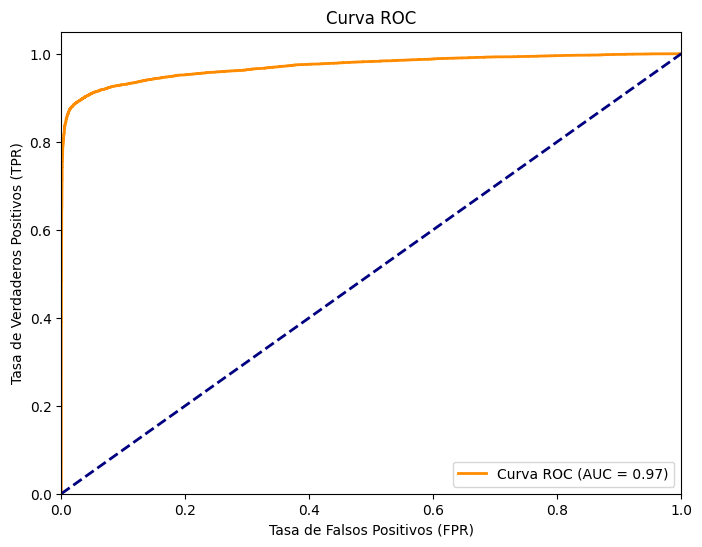

In [ ]:
y_scores = model.predict_proba(X)[:, 1]
fpr, tpr, thresholds = roc_curve(y, y_scores)
roc_auc = roc_auc_score(y, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Área de la curva : 0.97

Estos hallazgos respaldan la idoneidad del QDA para este escenario, ya que equilibra la detección de transacciones fraudulentas y la identificación de transacciones legítimas, minimizando tanto los falsos positivos como los falsos negativos. En resumen, los resultados del QDA sugieren su utilidad y eficacia en la detección de fraudes en transacciones con tarjeta de crédito.